In [1]:
from ExtractCell import *

In [2]:
img = Image2Sudoku(r"2.png")

In [3]:
cells = img.getCells()


In [52]:
for key, value in cells.items():
    if value is not None:
        #newValue = cv2.resize(value, (50,50))
        cv2.imwrite( 'T' + key + '.png', value)

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(columns = ['value', 'image'])

In [ ]:
df

In [5]:
import os
images = []
labels = []
for subdir, dirs, files in os.walk('data'):
    for subdir, dirs, files in os.walk(subdir):
        if files:
            label = subdir[-1:]
            for file in files:
                imagePath = subdir + "\\" + file
                images.append(cv2.imread(imagePath).flatten())
                labels.append(label)


AttributeError: 'NoneType' object has no attribute 'flatten'

In [ ]:
images = np.asarray(images)
labels = np.asarray(labels)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

KneighboursModel_5 = KNeighborsClassifier(n_neighbors=3)
SVCModelLinear = SVC(kernel='rbf', C=5, gamma=5)
NeuralModel = MLPClassifier(solver='lbfgs',
                            hidden_layer_sizes=(5, 4),
                            activation='identity',
                            random_state=0
                            )

In [ ]:
KneighboursModel_5.fit(images, labels)
SVCModelLinear.fit(images, labels)
NeuralModel.fit(images, labels)

In [ ]:
k = KneighboursModel_5.score(X_test, y_test)
s = SVCModelLinear.score(X_test, y_test)
n = NeuralModel.score(X_test, y_test)

In [ ]:
for subdir, dirs, files in os.walk('test'):
    for file in files:
        imagePath = subdir + "\\" + file
        print(imagePath)
        a = cv2.imread(imagePath).flatten()
        result = KneighboursModel_5.predict([a])
        print(result)

In [41]:
a = cv2.imread(r'C:\Users\e6ncbcy\Downloads\Sudoku-Image-Solver\model\test\T29.png')

In [43]:
active_px = np.argwhere(a!=0)
active_px = active_px[:,[1,0]]
x,y,w,h = cv2.boundingRect(active_px)
#cv2.rectangle(a,(x,y),(x+w,y+h),(255,0,0),1)
cv2.imwrite('lol.png', a[y:y+h, x:x+w])

True

In [33]:
a = cv2.copyMakeBorder( a, 4, 4, 4, 4,  cv2.BORDER_ISOLATED , value=[0,0,0])

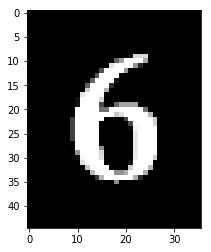

In [34]:
pl.imshow(a)